In [1]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, EarlyStopping


In [2]:
# Initialize image data generator with rescaling and data augmentation
train_data_gen = ImageDataGenerator(rescale=1.0/255)
validation_data_gen = ImageDataGenerator(rescale=1.0/255)

In [3]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
    'data/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

# Preprocess all validation images
validation_generator = validation_data_gen.flow_from_directory(
    'data/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
emotion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [12]:
history = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64
        )

Epoch 1/50


448/448 [==============================] - 12s 26ms/step - loss: 1.6079 - accuracy: 0.3621 - val_loss: 1.4010 - val_accuracy: 0.4513
Epoch 2/50
448/448 [==============================] - 11s 24ms/step - loss: 1.3687 - accuracy: 0.4755 - val_loss: 1.2920 - val_accuracy: 0.4950
Epoch 3/50
448/448 [==============================] - 11s 24ms/step - loss: 1.2636 - accuracy: 0.5188 - val_loss: 1.2138 - val_accuracy: 0.5378
Epoch 4/50
448/448 [==============================] - 12s 27ms/step - loss: 1.1937 - accuracy: 0.5498 - val_loss: 1.1505 - val_accuracy: 0.5590
Epoch 5/50
448/448 [==============================] - 11s 25ms/step - loss: 1.1423 - accuracy: 0.5650 - val_loss: 1.1399 - val_accuracy: 0.5635
Epoch 6/50
448/448 [==============================] - 11s 24ms/step - loss: 1.1010 - accuracy: 0.5843 - val_loss: 1.1047 - val_accuracy: 0.5801
Epoch 7/50
448/448 [==============================] - 11s 24ms/step - loss: 1.0620 - accuracy: 0.6004 - val_loss: 1.1054 - val_accuracy: 0.5791
Epo

In [13]:
import matplotlib.pyplot as plt

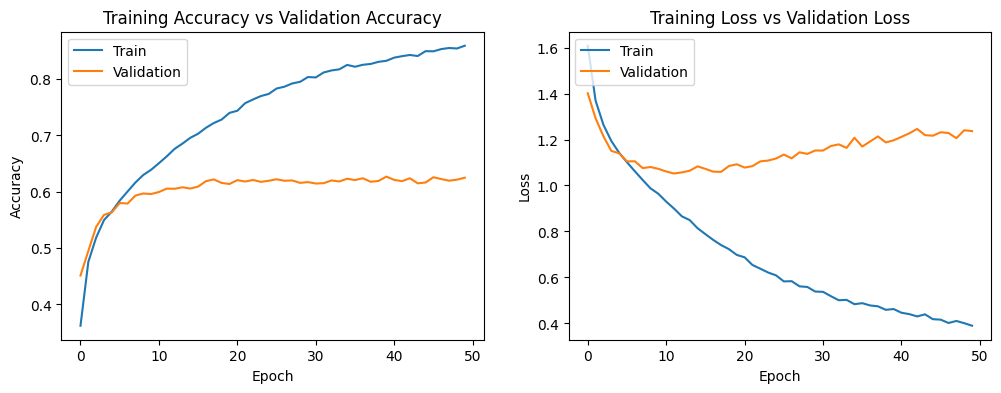

In [14]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [17]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("model85.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('model85.h5')

In [18]:
scores = emotion_model.evaluate(train_generator)

449/449 [==============================] - 9s 20ms/step - loss: 0.1172 - accuracy: 0.9884


In [19]:
scores = emotion_model.evaluate(validation_generator)

113/113 [==============================] - 2s 20ms/step - loss: 1.2368 - accuracy: 0.6250
